<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo I: Medidas de Distancia y Similitud. </font> </center>



## Introducción

Ya que se tiene determinado el tipo de dato a utilizar, se pueden realizar una medida de similitud
proponiendo el índice adecuado apropiado. 

>La primera y más importante es evitar la combinación de datos, esto debido a que cada tipo de dato presenta características propias que no comparten con los de otra naturaleza.

>Un índice de similitud $\delta_{i,j}$ es una medida de que tan parecido es un dato $i$ con otro $j$. Generalmente, las similaridades están acotadas en el rango de cero a uno; un aumento en la similaridad implica un aumento de la semejanza entre datos o variables, y toda similaridad de un dato consigo mismo debería ser igual al máximo valor posible, es decir, uno.

>Las distancias en cambio disminuyen con un aumento del parecido, no son negativas y la distancia de un elemento consigo mismo es cero. Tanto las matrices de similaridades como las de distancias son simétricas; es decir, la distancia entre el individuo `a` y el `b` es la misma que entre el `b` y el `a`.

>Dependiendo del método elegido para la ordenación, la clasificación, o el cálculo de índices de diversidad, así como de la escala de medición de los rasgos funcionales, la asociación entre los datos se expresará en términos de similaridad o distancia. Sin embargo, las similaridades pueden transformarse en distancias y viceversa.

Para el rango cero-uno, la similaridad $\delta_{i,j}$ puede ser transformada a distancia $d_{i,j}$ de la siguientes
formas:

$$d_{i,j} = 1 - \delta_{i,j}$$

$$d_{i,j} = \sqrt{1-\delta_{i,j}}$$

$$d_{i,j} = \sqrt{\delta_{i,j} -2\delta_{i,j} + \delta_{i,j}}$$

$$d_{i,j} = -\log{(\delta_{i,j})}$$

>El uso de índices de diversidad funcional basados en distancias, así como los métodos de
clasificación y/o de ordenación requiere una comprensión de las propiedades de la escala de
medición de los rasgos funcionales de las especies, y de las características de las medidas de
semejanza asociadas a cada tipo de datos.

## Similitud en Datos de Doble Estado o Binarios

Cuando la matriz de datos $X$, proviene de la observación de $n$ atributos que toman el valor 0 si la característica está ausente y el valor 1 si está presente, la información del grado de asociación entre cualquier par de individuos y puede representarse como una tabla de contingencia de 2x2 conocida conmunmente como **Matriz de Confusión**.

|             |               |               |$Muestra_j$   |         |
|:-----------:| ------------- |:-------------:|:------------:|:-------:|
|             |               |**Presente(1)**|**Ausente(0)**|         |
|             |**Presente(1)**|        a      |       b      |`a+b`    |
|$Muestra_i$  |**Ausente(0)** |        c      |       d      |`c+d`    |
|             |               |      `a+c`    |     `b+d`    |`a+b+c+d`|     

Donde $a$ es el número de caracteres presentes comunes, $b$ es el número de caracteres presente en
$i$ pero no en $j$, $c$ es el número de caracteres presentes en $j$ pero no presentes en $i$ y d es número
de caracteres no presentes en ambos datos. Para la matriz $X$ de dimensión $m × n$, es posible crear
o construir $\frac{n(n−1)}{2}$ Matrices de Confusión. 

Se han propuesto diversas medidas de similaridad que verifican estas propiedades, entre otros, Jaccard (1908), Rusell y Rao (1940), Sorensen (1948) y Sokal y Michener (1958). Sin embargo, existen similitudes que no verifican las propiedades de simetría y rango tales como la de Kulczynski (1970) acotada en el rango $[0,“ )$ y otros que expresan dependencia estocástica entre $x_i$ y $x_j$ como son las de Yule (1912) y la de Pearson (1926), acotadas en el rango $(-1,1)$, donde la mayor disimilaridad corresponde a $-1$, la similaridad total a $1$ y el valor 0 se asocia a la independencia estocástica.

> No existe un criterio universal de cuándo usar una u otra similitud. Los diferentes autores que han abordado el tema coinciden en que la elección de una determinada similitud dependerá del peso que se desea dar a las frecuencias de $a$, $b$, $c$ y $d$, del tipo de datos que se quieran representar y de la situación experimental (Legendre y Legendre 1979, Gower y Legendre 1986).

|Similaridad          |                                            | Simetría  | Rango         |
|:-------------------:|:------------------------------------------:|:---------:|:--------------:|
|Emparejamiento simple| $\frac{a+d}{a+b+c+d}$                      |si         |[0,1]        |
|Rogers y Tanimoto    | $\frac{a+d}{a+2b+2c+d}$                    |si         |[0,1]        |
|Hamman               | $\frac{(a+d)-(b+c)}{a+2b+2c+d}$            |si         |[-1,1]      |
|Yule                 | $\frac{ad-bc}{ad+bc}$                      |si         |[-1,1]       |
|Pearson              | $\frac{ad-bc}{\sqrt((a+c)(b+d)(a+b)(c+d))}$|si         |[-1,1]       |
|Jaccard              | $\frac{b+c}{a+b+c}$                        |No         |[0,1]        |
|Russel y Rao         | $\frac{a}{a+b+c+d}$                        |No         |[0,1]        |




No hay que olvidar que cada índice de similitud tiene propiedades distintas por lo que hay que
considerar el objetivo que se quiere obtener para elegir el índice adecuado.

In [1]:
import numpy as np

In [2]:
from scipy.spatial.distance import jaccard

In [3]:
y_i = [0,1,0,1,0,0]
y_j = [1,1,1,0,0,0]


In [4]:
Mc = np.array([[1, 1],
               [2, 2]])
Mc

array([[1, 1],
       [2, 2]])

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
m=confusion_matrix(y_i, y_j)

In [7]:
d = m[0,0]
c =m[0,1]
b= m[1,0]
a = m[1,1]

In [8]:
#Indice de similitud simple
simple = (a+b)/(a+b+c+d)
simple

0.3333333333333333

In [9]:
jaccard(y_i, y_j)

0.75

## Similitud en Datos multi estado Nominales 

Si las categorías para cada variable son codificadas por ejemplo, como: $0,1, 2, 3, . . . , k,$ el grado de
asociación entre cualquier par de individuos $x_i$ y $x_j$ puede medirse a través de la expansión del
emparejamiento simple que se expresará como:

$$d_{ij}=\frac{número\_de\_caracteres\_coincidentes}{número\_total\_de\_caracteres}$$

No obstante, cuando el cero representa ausencia del carácter es recomendable ignorar el empate
de ceros en forma similar como lo hace `Jaccard`.

Para el tratamiento de las variables ‘indicadoras excluyentes’ pueden utilizarse dos estrategias: 

>Uso de variables `‘auxiliares’` (dummy) o desdoblamiento en tantas variables como estados posibles presentes de la categoría.

En el caso de variables ‘auxiliares’ cada variable estará representada por tantas pseudo variables como número de estados diferentes menos uno. 

Así cada categoría tendrá asociado un perfil con un 1 en el estado en que se encuentre, estando el último estado representado solo por ceros.

>Cuando se realiza el desdoblamiento de una variable nominal en todos sus posibles estados, se
identifica la presencia o ausencia de cada estado del rasgo funcional en estudio, pero como estos
estados son excluyentes cada especie tendrá un solo valor de presencia (1) y el resto serán ceros.

In [10]:
data = {'Genero': ['M', 'F', 'F', 'M', 'F', 'F', 'F'],
        'Nombre': ['John', 'Camila','Luisa', 'Jose', 'Alejandra', ' Fer', 'Pau'],
        'Estatus marital': ['C', 'S', 'D', 'C', 'C', 'S', 'S']}
data


{'Genero': ['M', 'F', 'F', 'M', 'F', 'F', 'F'],
 'Nombre': ['John', 'Camila', 'Luisa', 'Jose', 'Alejandra', ' Fer', 'Pau'],
 'Estatus marital': ['C', 'S', 'D', 'C', 'C', 'S', 'S']}

In [11]:
import pandas as pd
df = pd.DataFrame(data)
df

,Genero,Nombre,Estatus marital
0,M,John,C
1,F,Camila,S
2,F,Luisa,D
3,M,Jose,C
4,F,Alejandra,C
5,F,Fer,S
6,F,Pau,S


In [12]:
df.set_index('Nombre', inplace=True)
df

,Genero,Estatus marital
Nombre,,
John,M,C
Camila,F,S
Luisa,F,D
Jose,M,C
Alejandra,F,C
Fer,F,S
Pau,F,S


In [13]:
df['Genero'].unique()

array(['M', 'F'], dtype=object)

In [14]:
df['Estatus marital'].unique()

array(['C', 'S', 'D'], dtype=object)

In [15]:
df_genero = pd.get_dummies(df['Genero'], prefix = 'Genero')
df_genero

,Genero_F,Genero_M
Nombre,,
John,0,1
Camila,1,0
Luisa,1,0
Jose,0,1
Alejandra,1,0
Fer,1,0
Pau,1,0


In [16]:
df_marital= pd.get_dummies(df['Estatus marital'], prefix = 'Estatus marital')
df_marital

,Estatus marital_C,Estatus marital_D,Estatus marital_S
Nombre,,,
John,1,0,0
Camila,0,0,1
Luisa,0,1,0
Jose,1,0,0
Alejandra,1,0,0
Fer,0,0,1
Pau,0,0,1


In [17]:
df

,Genero,Estatus marital
Nombre,,
John,M,C
Camila,F,S
Luisa,F,D
Jose,M,C
Alejandra,F,C
Fer,F,S
Pau,F,S


In [18]:
df_dummy = df_genero.join(df_marital)
df_dummy

,Genero_F,Genero_M,Estatus marital_C,Estatus marital_D,Estatus marital_S
Nombre,,,,,
John,0,1,1,0,0
Camila,1,0,0,0,1
Luisa,1,0,0,1,0
Jose,0,1,1,0,0
Alejandra,1,0,1,0,0
Fer,1,0,0,0,1
Pau,1,0,0,0,1


In [19]:
y_i = df_dummy.loc['John'].values
y_i

array([0, 1, 1, 0, 0], dtype=uint8)

In [20]:
y_j = df_dummy.loc['Alejandra'].values
y_j

array([1, 0, 1, 0, 0], dtype=uint8)

In [21]:
jaccard(y_i,y_j)

0.6666666666666666

In [22]:
df_dummy.index.to_list()

['John', 'Camila', 'Luisa', 'Jose', 'Alejandra', ' Fer', 'Pau']

In [23]:
#Obtener la similitud de todo el conjunto de datos en el dataframe
similaridad_df =[]
for i_ind in df_dummy.index.to_list():
    for j_ind in df_dummy.index.to_list():
        y_i = df_dummy.loc[i_ind].values
        y_j = df_dummy.loc[j_ind].values

        similaridad_df.append(jaccard(y_i, y_j))

In [24]:
pd.DataFrame(np.array(similaridad_df).reshape(7,7), index=df_dummy.index.to_list(), columns=df_dummy.index.to_list())

,John,Camila,Luisa,Jose,Alejandra,Fer,Pau
John,0.000000,1.000000,1.000000,0.000000,0.666667,1.000000,1.000000
Camila,1.000000,0.000000,0.666667,1.000000,0.666667,0.000000,0.000000
Luisa,1.000000,0.666667,0.000000,1.000000,0.666667,0.666667,0.666667
Jose,0.000000,1.000000,1.000000,0.000000,0.666667,1.000000,1.000000
Alejandra,0.666667,0.666667,0.666667,0.666667,0.000000,0.666667,0.666667
Fer,1.000000,0.000000,0.666667,1.000000,0.666667,0.000000,0.000000
Pau,1.000000,0.000000,0.666667,1.000000,0.666667,0.000000,0.000000


In [25]:
df_dummy.corr()

,Genero_F,Genero_M,Estatus marital_C,Estatus marital_D,Estatus marital_S
Genero_F,1.000000,-1.000000,-0.730297,0.258199,0.547723
Genero_M,-1.000000,1.000000,0.730297,-0.258199,-0.547723
Estatus marital_C,-0.730297,0.730297,1.000000,-0.353553,-0.750000
Estatus marital_D,0.258199,-0.258199,-0.353553,1.000000,-0.353553
Estatus marital_S,0.547723,-0.547723,-0.750000,-0.353553,1.000000


In [26]:
len(df_dummy)

7

In [27]:
def get_similarity_jaccard(df_dummy):
    similaridad_df =[]
    for i_ind in df_dummy.index.to_list():
        for j_ind in df_dummy.index.to_list():
            y_i = df_dummy.loc[i_ind].values
            y_j = df_dummy.loc[j_ind].values

            similaridad_df.append(jaccard(y_i, y_j))
    n = len(df_dummy)
    return pd.DataFrame(np.array(similaridad_df).reshape(n,n), index=df_dummy.index.to_list(), columns=df_dummy.index.to_list())

In [28]:
#Probando la funcion de similitud de jaccard
df_sim_jac =get_similarity_jaccard(df_dummy)
df_sim_jac

,John,Camila,Luisa,Jose,Alejandra,Fer,Pau
John,0.000000,1.000000,1.000000,0.000000,0.666667,1.000000,1.000000
Camila,1.000000,0.000000,0.666667,1.000000,0.666667,0.000000,0.000000
Luisa,1.000000,0.666667,0.000000,1.000000,0.666667,0.666667,0.666667
Jose,0.000000,1.000000,1.000000,0.000000,0.666667,1.000000,1.000000
Alejandra,0.666667,0.666667,0.666667,0.666667,0.000000,0.666667,0.666667
Fer,1.000000,0.000000,0.666667,1.000000,0.666667,0.000000,0.000000
Pau,1.000000,0.000000,0.666667,1.000000,0.666667,0.000000,0.000000


In [29]:
def get_similarity_pearson(df):
    #Obtiene la matriz de similitud de pearson
    
    return df_sim_pearson

In [30]:
import seaborn as sns

<AxesSubplot:>

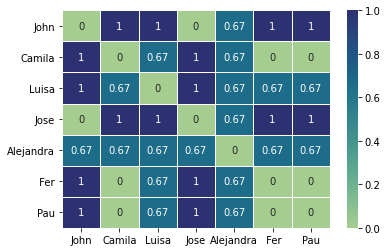

In [31]:
sns.heatmap(df_sim_jac, annot=True, linewidth=0.5, cmap='crest')

In [32]:
def emp_simple(yi,yj):
    mc = confusion_matrix(yi,yj)
    d = m[0,0]
    c = m[0,1]
    b = m[1,0]
    a = m[1,1]
    
    return (a+d)/(a+b+c+d)

In [33]:
y_i

array([1, 0, 0, 0, 1], dtype=uint8)

In [34]:
y_j

array([1, 0, 0, 0, 1], dtype=uint8)

In [35]:
emp_simple(y_i,y_j)

0.5

In [36]:
# Hacer una función que se llame get_similarity_simple() que reciba un dataframe con valores binarios y utilizando
#el metodo emp_simple, obtenga la matriz de similitud 
def get_similarity_simple(df):
    
    return dfsim_simple

## Viernes 4 de Octubre Examen del Módulo 1

## Similitud en Datos Multi Estado Ordinales 


Las variables ordinales pueden considerarse como variables cuantitativas si la asignación del ranking refleja en cierta forma una diferencia entre los estados de la variable. Por
ejemplo, si se considera la resistencia al fuego de un conjunto de muestras usando las categorías:
`muy baja`, `baja`, `media`, `alta` y `muy alta`; puede ser razonable asignarle valores: 0, 1, 2, 3, 4,
respectivamente ya que las categorías consecutivas pueden considerarse como equidistantes. De
esta manera, la nueva variable numérica podría ser tratada como una variable cuantitativa. 

In [37]:
data = {'Genero': ['M', 'F', 'F', 'M', 'F', 'F', 'F'],
        'Nombre': ['John', 'Camila','Luisa', 'Jose', 'Alejandra', ' Fer', 'Pau'],
        'Estatus marital': ['C', 'S', 'D', 'C', 'C', 'S', 'S'],
         'Educación':['Primaria','Secundaria', 'Terciaria', 'Secundaria', 'Terciaria', 'Primaria', 'Secundaria']}
df_data = pd.DataFrame(data)
df_data

,Genero,Nombre,Estatus marital,Educación
0,M,John,C,Primaria
1,F,Camila,S,Secundaria
2,F,Luisa,D,Terciaria
3,M,Jose,C,Secundaria
4,F,Alejandra,C,Terciaria
5,F,Fer,S,Primaria
6,F,Pau,S,Secundaria


In [38]:
df_data.set_index('Nombre', inplace=True)
df_data


,Genero,Estatus marital,Educación
Nombre,,,
John,M,C,Primaria
Camila,F,S,Secundaria
Luisa,F,D,Terciaria
Jose,M,C,Secundaria
Alejandra,F,C,Terciaria
Fer,F,S,Primaria
Pau,F,S,Secundaria


In [39]:
df_edu = df_data[['Educación']]
df_edu

,Educación
Nombre,
John,Primaria
Camila,Secundaria
Luisa,Terciaria
Jose,Secundaria
Alejandra,Terciaria
Fer,Primaria
Pau,Secundaria


In [40]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, John to Pau
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Educación  7 non-null      object
dtypes: object(1)
memory usage: 112.0+ bytes


In [41]:
df_edu = df_edu.astype('category')
df_edu

,Educación
Nombre,
John,Primaria
Camila,Secundaria
Luisa,Terciaria
Jose,Secundaria
Alejandra,Terciaria
Fer,Primaria
Pau,Secundaria


In [42]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, John to Pau
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Educación  7 non-null      category
dtypes: category(1)
memory usage: 195.0+ bytes


In [43]:
df_edu['Educación'].cat.codes

Nombre
John         0
Camila       1
Luisa        2
Jose         1
Alejandra    2
 Fer         0
Pau          1
dtype: int8

In [44]:
df_edu['Educación_codes'] = df_edu['Educación'].cat.codes
df_edu

,Educación,Educación_codes
Nombre,,
John,Primaria,0
Camila,Secundaria,1
Luisa,Terciaria,2
Jose,Secundaria,1
Alejandra,Terciaria,2
Fer,Primaria,0
Pau,Secundaria,1


In [45]:
df_edu['Educación'].unique()

['Primaria', 'Secundaria', 'Terciaria']
Categories (3, object): ['Primaria', 'Secundaria', 'Terciaria']

In [46]:
dic = {'Primaria':1, 'Secundaria':2, 'Terciaria':3}
df_edu['Educación_codes_2'] = df_edu['Educación'].map(dic)
df_edu

,Educación,Educación_codes,Educación_codes_2
Nombre,,,
John,Primaria,0,1
Camila,Secundaria,1,2
Luisa,Terciaria,2,3
Jose,Secundaria,1,2
Alejandra,Terciaria,2,3
Fer,Primaria,0,1
Pau,Secundaria,1,2


In [47]:
df_dummy

,Genero_F,Genero_M,Estatus marital_C,Estatus marital_D,Estatus marital_S
Nombre,,,,,
John,0,1,1,0,0
Camila,1,0,0,0,1
Luisa,1,0,0,1,0
Jose,0,1,1,0,0
Alejandra,1,0,1,0,0
Fer,1,0,0,0,1
Pau,1,0,0,0,1


In [48]:
df_dummy = df_dummy.join(df_edu[['Educación_codes_2']])
df_dummy

,Genero_F,Genero_M,Estatus marital_C,Estatus marital_D,Estatus marital_S,Educación_codes_2
Nombre,,,,,,
John,0,1,1,0,0,1
Camila,1,0,0,0,1,2
Luisa,1,0,0,1,0,3
Jose,0,1,1,0,0,2
Alejandra,1,0,1,0,0,3
Fer,1,0,0,0,1,1
Pau,1,0,0,0,1,2


## Similitud en datos cuantitativos

Generalizando para $m$ muestras y $n$ variables aleatorias cuantitativas (rasgos funcionales), la
distancia usual que se observa entre el par de unidades $x_i$ y $x_j$ cuando se representan en el espacio
de coordenadas definido por n variables cuantitativas, es conocida como distancia Euclideana:

$$d_{i,j} = \sqrt{\sum_{t=1}^n (x_{it} - x_{jt})^2}$$

donde $n$ son los rasgos funcionales. La distancia Euclídeana es la más conocida, la de mayor uso y
es la herramienta fundamental de cálculo de la mayoría de los métodos multivariados basados en
distancias. 

Sin embargo, presenta varios inconvenientes: 

>no está acotada, es sensible a cambios de
escalas y considera las n variables estocásticamente independientes.

Se han propuesto varias transformaciones que permiten minimizar y/o eliminar estos inconvenientes, entre otras: 

>se recomienda utilizarla en caso de homogeneidad entre la naturaleza física de las variables, cuando esto no es posible se puede estandarizar cada variable por su rango $r_t$ asegurando que la contribución de cualquier variable estará acotada en el intervalo (0,1).

Además puede dividirse por la cantidad de variables obteniendo una distancia media que oscilará en este
rango y facilita su conversión a similaridad, la expresión estará definida por:

$$d_{i,j} = \sqrt{\frac{1}{n} \sum_{t=1}^n \frac{(x_{it} - x_{jt})^2}{r_t}}$$

A continuación se presenta la formulación y propiedades de las distancias y disimilaridades no
negativas más utilizadas en los estudios de iversidad. Las más usadas son las distancias: Euclídea, Manhattan y Mahalanobis.

|Similaridad          |                                            | Simetría  | Rango         |
|:-------------------:|:------------------------------------------:|:---------:|:--------------:|
|Euclideana| $\sqrt{ \sum_{t=1}^n (x_{it} - x_{jt})^2}$                      |si         |[0,$\infty$]        |
|Manhattan    | $ \sum_{t=1}^n |x_{it} - x_{jt}|$                  |si         |[0,$\infty$]        |
|Bray-Curtis               | $\frac{ \sum_{t=1}^n |x_{it} - x_{jt}|}{ \sum_{t=1}^n (x_{it} + x_{jt})}$            |si         |[0,$\infty$]      |
|Canberra                 | $\sum_{t=1}^n\frac{ |x_{it} - x_{jt}|}{(|x_{it}| + |x_{jt}|)}$                       |si         |[0,$\infty$]       |
|Minkowski              | $^p\sqrt{ \sum_{t=1}^n (x_{it} - x_{jt})^p}$ |si         |[0,$\infty$]        |
|Mihalanobis              | $\sqrt{ \sum_{l=1}^n\sum_{t=1}^n (x_{it} - x_{jt}) \sigma_{lt}^{-1}(x_{il} - x_{jl})}$                       |si         |[0,$\infty$]        |




In [49]:
import scipy.spatial.distance as sc

### Ejemplo:


In [50]:
x = np.array([[2,3],
              [20,30],
              [-2,3],
              [2,-3]])
x

array([[ 2,  3],
       [20, 30],
       [-2,  3],
       [ 2, -3]])

In [51]:
df_x = pd.DataFrame(x, columns=['x1','x2'])
df_x

,x1,x2
0,2,3
1,20,30
2,-2,3
3,2,-3


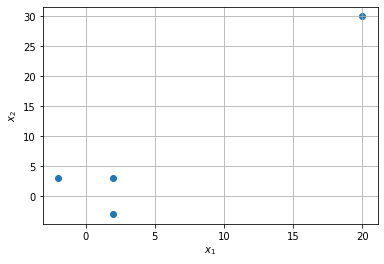

In [52]:
from matplotlib import pyplot as plt
plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [53]:
d1 = sc.pdist(x,'euclidean')
d1.shape

(6,)

In [54]:
sc.squareform(d1)

array([[ 0.        , 32.44996148,  4.        ,  6.        ],
       [32.44996148,  0.        , 34.82814953, 37.58989226],
       [ 4.        , 34.82814953,  0.        ,  7.21110255],
       [ 6.        , 37.58989226,  7.21110255,  0.        ]])

In [55]:
pd.DataFrame(sc.squareform(d1))

,0,1,2,3
0,0.000000,32.449961,4.000000,6.000000
1,32.449961,0.000000,34.828150,37.589892
2,4.000000,34.828150,0.000000,7.211103
3,6.000000,37.589892,7.211103,0.000000


In [56]:
def pdistance_matrix(df, metric):
    D1 = sc.squareform(sc.pdist(df.values,metric))
    return pd.DataFrame(D1)

In [57]:
pdistance_matrix(df_x,'euclidean')

,0,1,2,3
0,0.000000,32.449961,4.000000,6.000000
1,32.449961,0.000000,34.828150,37.589892
2,4.000000,34.828150,0.000000,7.211103
3,6.000000,37.589892,7.211103,0.000000


In [58]:
help(sc.pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *args, **kwargs)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : ndarray
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
        'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
        'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
    *args : tuple. Deprecated.
        Additional arguments should be passed as keyword arguments
    **kwargs : dict, optional
        Extra arguments to `metric`: refer to each metric documentation for a

In [59]:
from CDIN import CDIN as cd

In [60]:
help(cd.pdistance_matrix)

Help on function pdistance_matrix in module CDIN:

pdistance_matrix(df, metric)
    Este método obtiene la matriz de similitud de los datos en df, utilizando la métrica descrita en metric



In [62]:
cd.pdistance_matrix(df_x, 'euclidean')

,0,1,2,3
0,0.000000,32.449961,4.000000,6.000000
1,32.449961,0.000000,34.828150,37.589892
2,4.000000,34.828150,0.000000,7.211103
3,6.000000,37.589892,7.211103,0.000000


#### Normalización por minmax scaler, estandarización

### Canberra
$$\sum_i \frac{|u_i - v_i|}{|u_i| + |v_i|}$$

In [63]:
# Calcular las distancias por:
# Distacia Jaccard
# Distacia braycurtis
# Manhatan

cd.pdistance_matrix(df_x, 'canberra')

,0,1,2,3
0,0.000000,1.636364,1.000000,1.000000
1,1.636364,0.000000,1.818182,1.818182
2,1.000000,1.818182,0.000000,2.000000
3,1.000000,1.818182,2.000000,0.000000


### Estandarización de datos

$$z= \frac{x-\mu}{\sigma}$$

In [64]:
cd.pdistance_matrix(df_x, 'euclidean')

,0,1,2,3
0,0.000000,32.449961,4.000000,6.000000
1,32.449961,0.000000,34.828150,37.589892
2,4.000000,34.828150,0.000000,7.211103
3,6.000000,37.589892,7.211103,0.000000


In [65]:
df_x

,x1,x2
0,2,3
1,20,30
2,-2,3
3,2,-3


In [67]:
x = df_x.values
x

array([[ 2,  3],
       [20, 30],
       [-2,  3],
       [ 2, -3]])

In [69]:
x_std = (x-x.mean())/x.std()
x_std

array([[-0.44482191, -0.35357639],
       [ 1.19759744,  2.11005263],
       [-0.80980398, -0.35357639],
       [-0.44482191, -0.9010495 ]])

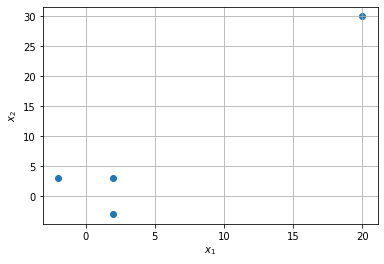

In [70]:
plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

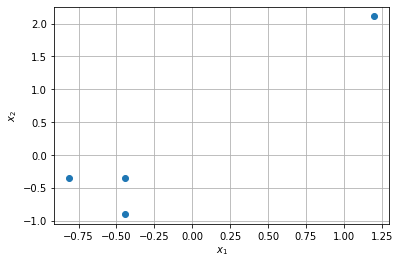

In [71]:
plt.figure()
plt.scatter(x_std[:,0],x_std[:,1])
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>]], dtype=object)

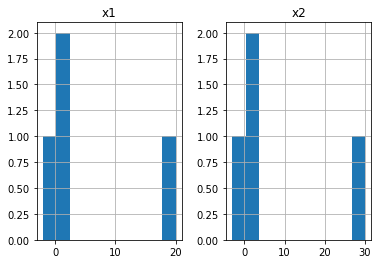

In [72]:
df_x.hist()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

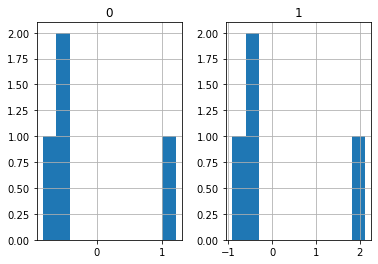

In [74]:
pd.DataFrame(x_std).hist()

In [75]:
cd.pdistance_matrix(pd.DataFrame(x_std), 'euclidean')

,0,1,2,3
0,0.000000,2.960914,0.364982,0.547473
1,2.960914,0.000000,3.177913,3.429909
2,0.364982,3.177913,0.000000,0.657981
3,0.547473,3.429909,0.657981,0.000000


### Similitud por Coseno

La función de similitud del coseno es:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$ A $ y $ B $ representan los vectores y $ A_i $ o $ B_i $ representan el índice i de ese vector.
& Hay que tener en cuenta que si A y B son idénticos, se obtendrá $ cos (\theta) = 1 $.

* De lo contrario, si son totalmente opuestos, es decir, $ A = -B $, obtendría $ cos (\theta) = -1 $.
* Si obtiene $ cos (\ theta) = 0 $, eso significa que son ortogonales (o perpendiculares).
* Los números entre 0 y 1 indican una puntuación de similitud.
* Los números entre -1-0 indican una puntuación de disimilitud.

### Deducción

$$A\cdot B = ||A||||B||cos(\theta)$$

$$\frac{A\cdot B}{||A||||B||} = cos(\theta)= similaridad \in [-1,1]$$

$$d= 1 - similaridad = 1 - \frac{A\cdot B}{||A||||B||} \in \{0,2\}$$

# ¿Qué pasa si mi dataset contiene todo tipo de datos?

# Datos Mixtos

Supongamos que sobre S muestras, representadas en la matriz $X$, se han observado simultáneamente diferentes muestras que por su naturaleza pueden corresponder a variables binarias,
cualitativas y cuantitativas. 

>La distancia entre individuos que presenten esta combinación de características puede ser medida a través de la similaridad de `Gower (1971)`. Esta similaridad es útil para tipos de datos mixtos.

La similaridad $\delta_{ijt}$ entre la $i$-ésima y la $j$-ésima muestra para la variable $t$, promediado sobre las $T$ variables o características, es la medida de similaridad propuesta por Grower (1971):

$$\delta_{ij}=\frac{1}{T} \delta_{ijt}$$

>En el caso de variables **binarias o cualitativas**, $\delta_{ijt}=1$ si $x_{it}=x_{jt}$ y $\delta_{ijt}=0$ si $x_{it}\neq x_{jt}$. 

>Si la variable es **cuantitativa** la similaridad entre los individuos estará dada por:

$$\delta_{ijt}=1-\frac{|x_{it} - x_{jt}|}{rt}$$

 donde $r_t$ es el rango (diferencia entre el máximo y el mínimo) de la $t$-ésima característica sobre toda la población. Si $x_{it}=x_{jt}$ entonces $\delta_{ijt}=1$, cuando $x_{it}$ y $x_{jt}$ se encuentan en los extremos de $r_t$ entonces $\delta_{ijt}=0$, y si $x_{it}$ y $x_{jt}$ son valores intermedios de $r_t$ entonces $0\leq \delta_{ijt} \leq 1$
 
 
 El tratamiento de los datos faltantes, la consideración de la ausencia simultánea de la característica, y la ponderación relativa de características, son debilidades metodológicas que afectan las medidas de similitud y distancias referidas hasta ahora para todo tipo de variables. 
 
 En este sentido, Gower introdujo en la expresión de la medida de similitud, ponderaciones denominadas $w_{ijt}$, como una función que
depende de cada par de datos $x_{it}$ y $x_{jt}$ , obteniendo la siguiente expresión general:

$$\delta_{ij} = \frac{\sum_{t=1}^T w_{ijt}\delta_{ijt}}{\sum_{t=1}^T w_{ijt}}$$

## Ejemplo:


1. Encontrar la distancia Manhattan entre cada muestra para las variables numéricas
2. Normalizar la matriz de similitud

Calcular la distancia de similitud para las variables categóricas. 

1. Primero hay que convertir las variables categoricas nominales a variables dummies y después calcular las distancias de similitud (DICE)

As expected the matrix returns a value of 1 wherever if finds a non equal value.

In [ ]:
#!pip install gower

In [ ]:
help(gower.gower_matrix)

## Ejemplo 2:

Podemos interpretar la matriz de la siguiente manera. En la primera columna, vemos la diferencia del primer cliente con todos los demás. Este cliente es similar al segundo, tercer y sexto cliente.